### System Hamiltonian

Total Hilbert space for the system is $\mathbb{C}_2 \times \mathbb{C}_2$. \
The total Hamiltonian of two coupled qubits is given by:

$$
H = \frac{\hbar \omega^{(1)}}{2} \sigma_z^{(1)} + \frac{\hbar \omega^{(2)}}{2} \sigma_z^{(2)} + J_{12} \left( \sigma_y^{(1)} \sigma_y^{(2)} + \sigma_x^{(1)} \sigma_x^{(2)} \right)
$$

### Master Equation

The time evolution of the density matrix $\rho$ is governed by the Lindblad master equation:

$$
\frac{\partial \rho}{\partial t} = -i[H, \rho] + \mathcal{D}^{(1)}(\rho) + \mathcal{D}^{(2)}(\rho)
$$

### Dissipator Terms

Each dissipator $\mathcal{D}^{(i)}(\rho)$ is defined as:

$$
\mathcal{D}^{(i)}(\rho) = \sum_{j=1,2} \left( R_j^{(i)} \rho R_j^{(i)\dagger} - \frac{1}{2} \left\{ R_j^{(i)\dagger} R_j^{(i)}, \rho \right\} \right)
$$

Where the jump operators are:

$$
R_1^{(i)} = \sqrt{\gamma (N_\text{th}^{(i)} + 1)} \, R^{(i)}, \quad
R_2^{(i)} = \sqrt{\gamma N_\text{th}^{(i)}} \, R^{(i)^{\dagger}}
$$

And the squeezed operator $R^{(i)}$ is:

$$
R^{(i)} = \sigma_-^{(i)} \cosh(r) + e^{i\phi} \sigma_+^{(i)} \sinh(r)
$$

The thermal occupation number is:

$$
N_\text{th}^{(i)} = \frac{1}{e^{\frac{\hbar \omega^{(i)}}{k_B T^{(i)}}} - 1}
$$

---

We start with the time derivative of the expectation value:

$$
\frac{d}{dt} \langle \sigma_z \rangle = \frac{d}{dt} \mathrm{Tr}(\sigma_z \rho)
= \mathrm{Tr} \left( \sigma_z \frac{d\rho}{dt} \right)
$$

Using the Lindblad master equation:

$$
\frac{\partial \rho}{\partial t} = -i[H, \rho] + \sum_{i=1}^2 \mathcal{D}^{(i)}(\rho)
$$

we obtain:

$$
\frac{d}{dt} \langle \sigma_z \rangle = -i \, \mathrm{Tr}(\sigma_z [H, \rho]) + \sum_i \mathrm{Tr} \left( \sigma_z \mathcal{D}^{(i)}(\rho) \right)
$$

---

### Hamiltonian Part

Using cyclicity of the trace:

$$
-i \, \mathrm{Tr}(\sigma_z [H, \rho]) = -i \, \mathrm{Tr}(\rho [\sigma_z, H]) = i \langle [\sigma_z, H] \rangle
$$

---

### Dissipative Part

From the Lindblad dissipator for $i^{\text{th}}$ bath:

$$
\mathcal{D}^{(i)}(\rho) = \sum_j \left( R_j^{(i)} \rho R_j^{(i)\dagger} - \frac{1}{2} \left\{ R_j^{(i)\dagger} R_j^{(i)}, \rho \right\} \right)
$$

Then:

$$
\mathrm{Tr} \left( \sigma_z \mathcal{D}^{(i)}(\rho) \right) 
= \sum_j \mathrm{Tr} \left( \sigma_z R_j^{(i)} \rho R_j^{(i)\dagger} \right)
- \frac{1}{2} \mathrm{Tr} \left( \sigma_z R_j^{(i)\dagger} R_j^{(i)} \rho + \sigma_z \rho R_j^{(i)\dagger} R_j^{(i)} \right)
$$

$$
= \sum_j \left( \langle R_j^{(i)\dagger} \sigma_z R_j^{(i)} \rangle 
- \frac{1}{2} \langle \{ R_j^{(i)\dagger} R_j^{(i)}, \sigma_z \} \rangle \right)
$$

---

### Final Result

Combining both contributions:

$$
\frac{d}{dt} \langle \sigma_z \rangle 
= i \langle [H, \sigma_z] \rangle 
+ \sum_{i,j=1}^2 \left( \langle R_j^{(i)\dagger} \sigma_z R_j^{(i)} \rangle 
- \frac{1}{2} \langle \{ R_j^{(i)\dagger} R_j^{(i)}, \sigma_z \} \rangle \right)
$$

Here,
$$
H = H^A + H^B + H_{int}
$$

Thus for spin current for system A,
$$
J_s^A = i \langle [H, \sigma_z^A] \rangle
$$
$$
= i \langle [H_{int}, \sigma_z^A] \rangle
$$

In [14]:
# Save to specific path
import os
output_dir = "/home/d-ghosh/Documents/Project/Plots"
os.makedirs(output_dir, exist_ok=True)  # Ensure directory exists

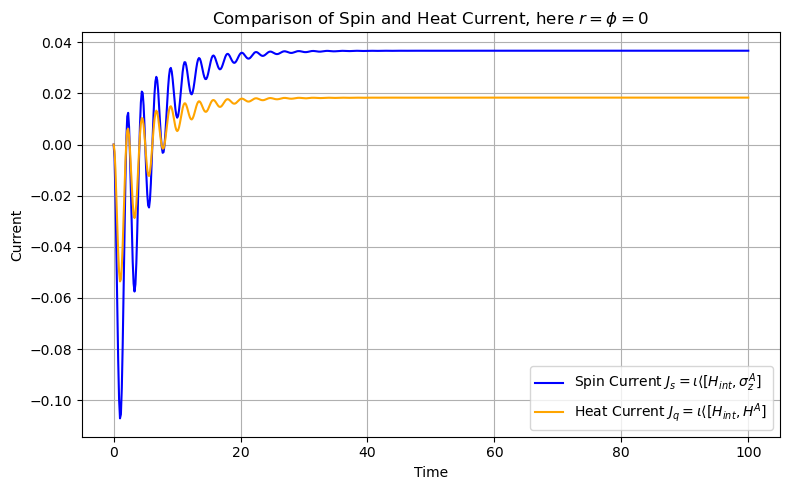

In [68]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

sx, sy, sz = sigmax(), sigmay(), sigmaz()
sm, sp = sigmam(), sigmap()
I = qeye(2)

smA = tensor(sm, I)
smB = tensor(I, sm)
spA = smA.dag()
spB = smB.dag()

szA = tensor(sz, I)
szB = tensor(I, sz)
sxA = tensor(sx, I)
sxB = tensor(I, sx)
syA = tensor(sy, I)
syB = tensor(I, sy)

omega_A, omega_B = 1.0, 1.0
J = 0.7

H_A = 0.5 * omega_A * szA
H_B = 0.5 * omega_B * szB
H_int = J * (sxA * sxB + syA * syB)
H = H_A + H_B + H_int

rA, phiA, T_A, gammaA = 0.0, 0.0, 1 / 0.95, 0.1
rB, phiB, T_B, gammaB = 0.0, 0.0, 1 / 0.72, 0.1
NthA, NthB = 0.1, 0.8

R_A = smA * np.cosh(rA) + spA * np.exp(1j * phiA) * np.sinh(rA)
R_B = smB * np.cosh(rB) + spB * np.exp(1j * phiB) * np.sinh(rB)
R1_A = np.sqrt(gammaA * (NthA + 1)) * R_A
R2_A = np.sqrt(gammaA * NthA) * R_A.dag()
R1_B = np.sqrt(gammaB * (NthB + 1)) * R_B
R2_B = np.sqrt(gammaB * NthB) * R_B.dag()
c_ops = [R1_A, R2_A, R1_B, R2_B]


psi0 = tensor(basis(2, 0), basis(2, 0))
rho0 = ket2dm(psi0)


Js_op = 1j * (H_int * szA - szA * H_int)
Jq_op = 1j * (H_int * H_A - H_A * H_int)


tlist = np.linspace(0, 100, 700)
result = mesolve(H, rho0, tlist, c_ops, e_ops=[Js_op, Jq_op])

Js_vals = np.real(result.expect[0])
Jq_vals = np.real(result.expect[1])

plt.figure(figsize=(8, 5))
plt.plot(tlist, Js_vals, label='Spin Current $J_s=\iota \langle [H_{int}, \sigma_z^A]$', color='blue')
plt.plot(tlist, Jq_vals, label='Heat Current $J_q=\iota \langle [H_{int}, H^A]$', color='orange')
plt.xlabel('Time')
plt.ylabel('Current')
plt.title(r'Comparison of Spin and Heat Current, here $r=\phi=0$')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

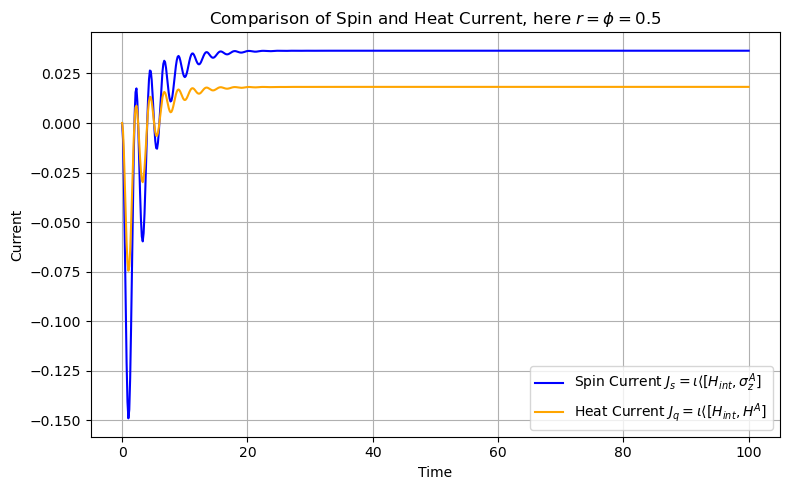

In [69]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

sx, sy, sz = sigmax(), sigmay(), sigmaz()
sm, sp = sigmam(), sigmap()
I = qeye(2)

smA = tensor(sm, I)
smB = tensor(I, sm)
spA = smA.dag()
spB = smB.dag()

szA = tensor(sz, I)
szB = tensor(I, sz)
sxA = tensor(sx, I)
sxB = tensor(I, sx)
syA = tensor(sy, I)
syB = tensor(I, sy)

omega_A, omega_B = 1.0, 1.0
J = 0.7

H_A = 0.5 * omega_A * szA
H_B = 0.5 * omega_B * szB
H_int = J * (sxA * sxB + syA * syB)
H = H_A + H_B + H_int

rA, phiA, T_A, gammaA = 0.5, 0.5, 1 / 0.95, 0.1
rB, phiB, T_B, gammaB = 0.5, 0.5, 1 / 0.72, 0.1
NthA, NthB = 0.1, 0.8

R_A = smA * np.cosh(rA) + spA * np.exp(1j * phiA) * np.sinh(rA)
R_B = smB * np.cosh(rB) + spB * np.exp(1j * phiB) * np.sinh(rB)
R1_A = np.sqrt(gammaA * (NthA + 1)) * R_A
R2_A = np.sqrt(gammaA * NthA) * R_A.dag()
R1_B = np.sqrt(gammaB * (NthB + 1)) * R_B
R2_B = np.sqrt(gammaB * NthB) * R_B.dag()
c_ops = [R1_A, R2_A, R1_B, R2_B]


psi0 = tensor(basis(2, 0), basis(2, 0))
rho0 = ket2dm(psi0)


Js_op = 1j * (H_int * szA - szA * H_int)
Jq_op = 1j * (H_int * H_A - H_A * H_int)


tlist = np.linspace(0, 100, 700)
result = mesolve(H, rho0, tlist, c_ops, e_ops=[Js_op, Jq_op])

Js_vals = np.real(result.expect[0])
Jq_vals = np.real(result.expect[1])

plt.figure(figsize=(8, 5))
plt.plot(tlist, Js_vals, label='Spin Current $J_s=\iota \langle [H_{int}, \sigma_z^A]$', color='blue')
plt.plot(tlist, Jq_vals, label='Heat Current $J_q=\iota \langle [H_{int}, H^A]$', color='orange')
plt.xlabel('Time')
plt.ylabel('Current')
plt.title(r'Comparison of Spin and Heat Current, here $r=\phi=0.5$')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

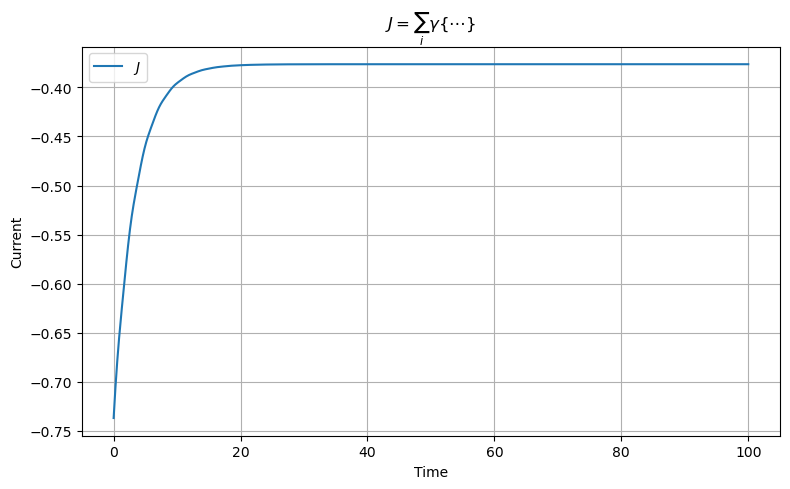

In [6]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

sx, sy, sz = sigmax(), sigmay(), sigmaz()
sm, sp = sigmam(), sigmap()
I = qeye(2)

smA = tensor(sm, I)
smB = tensor(I, sm)
spA = smA.dag()
spB = smB.dag()

szA = tensor(sz, I)
szB = tensor(I, sz)
sxA = tensor(sx, I)
sxB = tensor(I, sx)
syA = tensor(sy, I)
syB = tensor(I, sy)

omega_A, omega_B = 1.0, 1.0
J = 0.7

H_A = 0.5 * omega_A * szA
H_B = 0.5 * omega_B * szB
H_int = J * (sxA * sxB + syA * syB)
H = H_A + H_B + H_int

rA, phiA, T_A, gammaA = 0.5, 0.0, 1 / 0.95, 0.1
rB, phiB, T_B, gammaB = 0.5, 0.0, 1 / 0.72, 0.1
NthA, NthB = 0.1, 0.8

R_A = smA * np.cosh(rA) + spA * np.exp(1j * phiA) * np.sinh(rA)
R_B = smB * np.cosh(rB) + spB * np.exp(1j * phiB) * np.sinh(rB)
R1_A = np.sqrt(gammaA * (NthA + 1)) * R_A
R2_A = np.sqrt(gammaA * NthA) * R_A.dag()
R1_B = np.sqrt(gammaB * (NthB + 1)) * R_B
R2_B = np.sqrt(gammaB * NthB) * R_B.dag()
c_ops = [R1_A, R2_A, R1_B, R2_B]


psi0 = tensor(basis(2, 0), basis(2, 0))
rho0 = ket2dm(psi0)


Js_op = 1j * (H_int * szA - szA * H_int)
Jq_op = 1j * (H_int * H_A - H_A * H_int)


tlist = np.linspace(0, 100, 700)

popA_op = spA * smA
popB_op = spB * smB

result_full = mesolve(H, rho0, tlist, c_ops, e_ops=[popA_op, popB_op])

popA_vals = np.real(result_full.expect[0])
popB_vals = np.real(result_full.expect[1])

def correction_term(Nth, r, phi, gamma, pop_vals):
    term1 = Nth - np.sinh(r)**2 - 2 * np.cos(phi) * np.cosh(r) * np.sinh(r)
    term2 = (Nth + (Nth + 1) * np.cosh(2 * r)) * pop_vals
    return gamma * (term1 - term2)

expr_vals = correction_term(NthA, rA, phiA, gammaA, popA_vals) + correction_term(NthB, rB, phiB, gammaB, popB_vals)

plt.figure(figsize=(8, 5))
plt.plot(tlist, expr_vals, label=r'$J$')
plt.xlabel('Time')
plt.ylabel(r'Current')
plt.title(r'$J = \sum_i \gamma \{\cdots\}$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

sx, sy, sz = qt.sigmax(), qt.sigmay(), qt.sigmaz()
sm, sp = qt.sigmam(), qt.sigmap()
I = qt.qeye(2)

smA = qt.tensor(sm, I)
smB = qt.tensor(I, sm)
spA = smA.dag()
spB = smB.dag()

szA = qt.tensor(sz, I)
szB = qt.tensor(I, sz)
sxA = qt.tensor(sx, I)
sxB = qt.tensor(I, sx)
syA = qt.tensor(sy, I)
syB = qt.tensor(I, sy)

Delta_A, Delta_B = 1.0, 1.0
J = 0.7

H_A = 0.5 * Delta_A * szA
H_B = 0.5 * Delta_B * szB
H_int = J * (sxA * sxB + syA * syB)
H = H_A + H_B + H_int

rA, phiA, T_A, gammaA = 0.5, 0.5, 1 / 0.95, 1.0
rB, phiB, T_B, gammaB = 0.5, 0.5, 1 / 0.72, 1.0
NthA, NthB = 0.2, 0.8

R_A = smA * np.cosh(rA) + spA * np.exp(1j * phiA) * np.sinh(rA)
R_B = smB * np.cosh(rB) + spB * np.exp(1j * phiB) * np.sinh(rB)
R1_A = np.sqrt(gammaA * (NthA + 1)) * R_A
R2_A = np.sqrt(gammaA * NthA) * R_A.dag()
R1_B = np.sqrt(gammaB * (NthB + 1)) * R_B
R2_B = np.sqrt(gammaB * NthB) * R_B.dag()
c_ops = [R1_A, R2_A, R1_B, R2_B]

# Compute steadystate
rhoss = qt.steadystate(H, c_ops)

def tilted_liouvillian(H, L_list, chi, v_list):
    """
    Constructs a tilted Liouvillian for a system with multiple jump operators and corresponding v values.

    Parameters:
    H : Qobj
        The Hamiltonian of the system.
    L_list : list of Qobj
        A list of jump operators.
    chi : float
        The tilt parameter.
    v_list : list of float
        A list of parameters that couple with chi, one for each jump operator.

    Returns:
    Qobj
        The tilted Liouvillian superoperator.
    """
    # Check that the number of jump operators matches the number of v values
    if len(L_list) != len(v_list):
        raise ValueError("The number of jump operators must match the number of v values.")
    
    # Hamiltonian part remains the same
    H_vec = qt.spre(H) - qt.spost(H)
    
    # Initialize the dissipative part
    L_vec_total = 0
    
    # Loop through all jump operators and their corresponding v values
    for L, v in zip(L_list, v_list):
        L_vec = np.exp(1j * chi * v) * qt.to_super(L) - 0.5 * (qt.spre(L.dag() * L) + qt.spost(L.dag() * L))
        L_vec_total += L_vec
    
    # Combine Hamiltonian and dissipative parts
    return -1j * H_vec + L_vec_total

rhoss

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.10727335+0.j          0.        +0.j          0.        +0.j
  -0.00257793-0.00476644j]
 [ 0.        +0.j          0.19471439+0.j         -0.00346335-0.02579699j
   0.        +0.j        ]
 [ 0.        +0.j         -0.00346335+0.02579699j  0.250097  +0.j
   0.        +0.j        ]
 [-0.00257793+0.00476644j  0.        +0.j          0.        +0.j
   0.44791527+0.j        ]]

In [8]:
# Compute vectorised density operator
rhovec = qt.operator_to_vector(rhoss)

# Create chi space
v = [-1, 1, -1, 1]  # Corresponding v values for each jump operator
chi = np.linspace(-np.pi, np.pi, 1000)
d_chi = chi[1]-chi[0]

t = [5, 15, 30, 50]

# Compute tilted Liouvillians
liouvs = [tilted_liouvillian(H, c_ops, i, v) for i in chi]
rho_chi = [[qt.vector_to_operator((liou * ti).expm()*rhovec) for liou in liouvs] for ti in t]

# Take trace of all rhochis
pchis = np.array([[rho.tr() for rho in rhoix] for rhoix in rho_chi])
# tilted_liouvillian(H, c_ops, chi[6], v)

In [9]:
print("Shape of pchis:", pchis.shape)
print("Shape of chi:", chi.shape)

Shape of pchis: (4, 1000)
Shape of chi: (1000,)


In [10]:
#Compute n vals
nmax = 50
n = np.arange(-nmax, nmax + 1)
# Peform Fourier transform
def prob(n): 
    return np.abs([trapezoid(np.exp(-1j*ni*chi)*pchis, chi, dx=d_chi, axis=1) for ni in n])/(2*np.pi)

# n = np.arange(-nmax, nmax + 1)
P = prob(n)
n.shape

(101,)

In [11]:
while P[0, 1] + P[-1, 1] > 1e-13:
        P = np.vstack((prob(np.arange(-nmax - 10, -nmax)), P, prob(np.arange(nmax + 1, nmax + 11))))
        nmax += 10
np.around(P, decimals=10)
# P.T[0].shape

# # Step 1: Calculate the sum of the second column
# for i in range(P.shape[1]):
#     norm = np.sum(P[:, i])

#     # Step 2: Normalize the second column
#     if norm != 0:  # Avoid division by zero
#         P[:, i] /= norm
#     else:
#         print("Normalization factor is zero. Skipping normalization.")
#         break

P.T[0].shape

(141,)

In [12]:
final_nmax = (P.shape[0] - 1) // 2
n = np.arange(-final_nmax, final_nmax + 1)
n.shape

(141,)

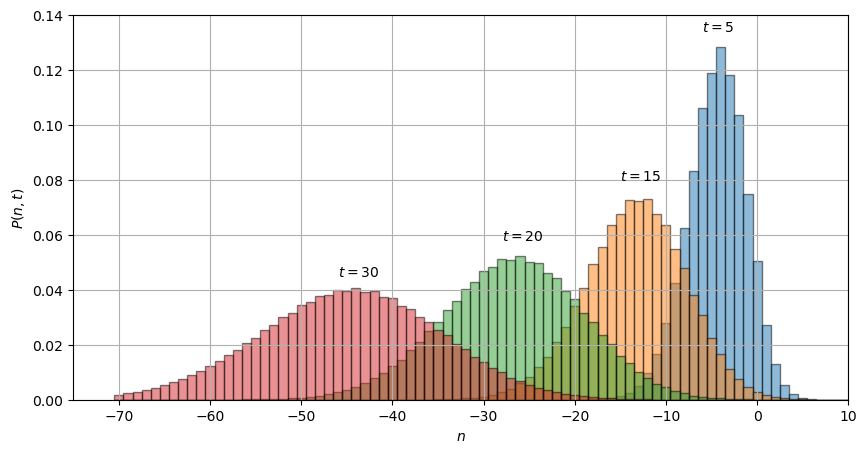

In [31]:
fig = plt.figure(figsize=(10, 5))

plt.bar(n, P.T[0], width = 1, alpha=0.5, edgecolor = 'k')
plt.bar(n, P.T[1], width = 1, alpha=0.5, edgecolor = 'k')
plt.bar(n, P.T[2], width = 1, alpha=0.5, edgecolor = 'k')
plt.bar(n, P.T[3], width = 1, alpha=0.5, edgecolor = 'k')

# plt.plot(n, P.T[0], label='0.1') #width = 1, alpha=0.5, edgecolor = 'k')
# plt.plot(n, P.T[1], label = '0.2') #width = 1, alpha=0.5, edgecolor = 'k')
# plt.plot(n, P.T[2], label = '0.5') #width = 1, alpha=0.5, edgecolor = 'k')
# plt.plot(n, P.T[3], label = '1.0') #width = 1, alpha=0.5, edgecolor = 'k')

#plt.title('The FCS probability ' + r'$P(n, t)$,' + 'The negative count corresponds \nto the particle current flowing from cold to hot.')
plt.xlim([-75, 10])
plt.ylim([0, 0.14])
# plt.yticks(np.arange(0, 0.30, 0.05))
plt.text(-6, 0.134, r'$t=5$')
plt.text(-15, 0.08, r'$t=15$')
plt.text(-28, 0.058, r'$t=20$')
plt.text(-46, 0.045, r'$t=30$')
plt.grid()
plt.xlabel(r'$n$')
plt.ylabel(r'$P(n,t)$')
plt.savefig(os.path.join(output_dir, "PDF_2S2B_SGAD.png"), dpi=600, bbox_inches='tight')
plt.show()